In [3]:
# some_file.py
import numpy as np
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/Users/dananjayaliyanage/git/emulator-validation/src')
from configurations import load_design
from bayes_mcmc import Chain, credible_interval

Using idf = 0 : Grad
The active observable list for calibration: {'Pb-Pb-2760': ['dNch_deta', 'dET_deta', 'dN_dy_pion', 'dN_dy_kaon', 'dN_dy_proton', 'mean_pT_pion', 'mean_pT_kaon', 'mean_pT_proton', 'pT_fluct', 'v22', 'v32', 'v42']}


/Users/dananjayaliyanage/Downloads/enter/envs/hc/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Loading Pb-Pb-2760 main calculations from model_calculations/production_500pts_Pb_Pb_2760/Obs/main.dat
model_data.shape = (500,)
Design points which will be deleted from training : [289, 483, 324, 326, 459, 429, 334, 462, 242, 341, 406, 440, 377, 123, 447]
Loading Pb-Pb-2760 MAP calculations from model_calculations/MAP/Grad/Obs/obs_Pb-Pb-2760.dat
MAP_data.shape = (1,)
Loading experimental data from HIC_experimental_data


In [4]:
chain_base=Chain(path=Path('/Users/dananjayaliyanage/git/emulator-validation/mcmc/sensitivity/chain_base_2-idf-0.hdf'))

chain_base_2=Chain(path=Path('/Users/dananjayaliyanage/git/emulator-validation/mcmc/sensitivity/chain_base_3-idf-0.hdf'))

chain_dN_dy_pion=Chain(path=Path('/Users/dananjayaliyanage/git/emulator-validation/mcmc/sensitivity/chain_dN_dy_pion_mb-idf-0.hdf'))

chain_mean_pT_pion=Chain(path=Path('/Users/dananjayaliyanage/git/emulator-validation/mcmc/sensitivity/chain_mean_pT_pion_mb-idf-0.hdf'))

chain_v22=Chain(path=Path('/Users/dananjayaliyanage/git/emulator-validation/mcmc/sensitivity/chain_v22_mb-idf-0.hdf'))

chain_v32=Chain(path=Path('/Users/dananjayaliyanage/git/emulator-validation/mcmc/sensitivity/chain_v32_mb-idf-0.hdf'))

#chain_v42=Chain(path=Path('/Users/dananjayaliyanage/git/emulator-validation/mcmc/sensitivity/chain_v42-idf-0.hdf'))

Loading main points from production_designs/500pts/design_pts_Pb_Pb_2760_production/design_points_main_PbPb-2760.dat
Loading main ranges from production_designs/500pts/design_pts_Pb_Pb_2760_production/design_ranges_main_PbPb-2760.dat
Summary of design : 
Pre-compute experimental covariance matrix
WARNING! Multiplying experimental error by values in change_exp_error_vals : 
{'Au-Au-200': {}, 'Pb-Pb-2760': {'v32': 0.5}}
Loading main points from production_designs/500pts/design_pts_Pb_Pb_2760_production/design_points_main_PbPb-2760.dat
Loading main ranges from production_designs/500pts/design_pts_Pb_Pb_2760_production/design_ranges_main_PbPb-2760.dat
Summary of design : 
Pre-compute experimental covariance matrix
WARNING! Multiplying experimental error by values in change_exp_error_vals : 
{'Au-Au-200': {}, 'Pb-Pb-2760': {'v32': 0.5}}
Loading main points from production_designs/500pts/design_pts_Pb_Pb_2760_production/design_points_main_PbPb-2760.dat
Loading main ranges from production_des

In [5]:
chain_1=chain_base.load()
chain_2=chain_dN_dy_pion.load()
chain_3=chain_mean_pT_pion.load()
chain_4=chain_v22.load()
chain_5=chain_v32.load()
#chain_6=chain_v42.load()
chain_7=chain_base_2.load()

In [10]:
def calculate_sigma_for_chain(chain_name,ci=0.90):
    """Calculates the ci's for all parameters in the model.
    It returns an array of sigma values"""
    sigmas=[]
    for i in range(0,chain_name.shape[1]):
        a,b=credible_interval(chain_name[:,i])
        sigmas.append((b-a)/2)
    return np.array(sigmas)    

In [11]:
name= ['norm','trento_p','sigma_k','nucleon_width','dmin3','tau_R','alpha','eta_over_s_T_kink','eta_over_s_low_T_slope',
      'eta_over_s_high_T_slope','eta_over_s_kink','zeta_over_s_max','zeta_over_s_T_peak','zeta_over_s_width','zeta_over_s_lambda_asymm'
      ,'shear_relax_time_factor','Tswitch','extra_cov_uncertinitiy']
def make_sensitivity_plot(chain_name,base_chain=chain_1):
    """make sensitivity plot compared to the base chain"""
    base_sigmas=calculate_sigma_for_chain(base_chain)
    sigmas=calculate_sigma_for_chain(chain_name)
    diff=sigmas-base_sigmas
    score=np.divide(np.abs((sigmas-base_sigmas)),base_sigmas)
    fig,axes=plt.subplots()#(nrows=1, ncols=1, sharex=True)
    barlist=axes.bar(name,score)
    plt.xticks(rotation='vertical')
    for j,difference in enumerate(diff):
        if difference<0:
            barlist[j].set_color('r')        
    plt.show()                        

In [ ]:
len(chain_1[:,1])

In [ ]:
calculate_sigma_for_chain(chain_1)


In [12]:
chain_list=[chain_1,chain_2,chain_3,chain_4,chain_5,chain_7]
#y_labels=[r'$dN_{\pi}/dy$',r'${\langle} p_T {\rangle}_{\pi}$',r'$v_2\{2\}$',r'$v_3\{2\}$',r'$v_4\{2\}$','no change']
y_labels=[r'$dN_{\pi}/dy$',r'${\langle} p_T {\rangle}_{\pi}$',r'$v_2\{2\}$',r'$v_3\{2\}$','no change']
def make_all_sensitivity_plot():
    """make all sensitivity plots compared to the base chain"""
    fig,axes=plt.subplots(nrows=5, ncols=1, sharex=True ,figsize=(10, 20))
    base_sigmas=calculate_sigma_for_chain(chain_1)
    for j,ax in enumerate(axes):
        sigmas=calculate_sigma_for_chain(chain_list[j+1])
        diff=sigmas-base_sigmas
        score=np.divide(np.abs((sigmas-base_sigmas)),base_sigmas)
        barlist=ax.bar(name,score)
        ax.set_ylabel('sensitivity to '+y_labels[j],fontsize=14)
        ax.set_ylim(0,0.25)
        ax.grid(b=True,axis='x')
        for j,difference in enumerate(diff):
            if difference<0:
                barlist[j].set_color('r')   
    
    plt.xticks(rotation='vertical',fontsize=14)
    plt.xlabel('Model parameters',fontsize=18)
   # plt.ylabel('Varied Observable',fontsize=18)
    plt.tight_layout()
    plt.savefig('sensitivity_mb.png',dpi=300)
    plt.show()
    

In [10]:
for i,na in enumerate(name):
    print('({}) {}'.format(i+1,na))

(1) norm
(2) trento_p
(3) sigma_k
(4) nucleon_width
(5) dmin3
(6) tau_R
(7) alpha
(8) eta_over_s_T_kink
(9) eta_over_s_low_T_slope
(10) eta_over_s_high_T_slope
(11) eta_over_s_kink
(12) zeta_over_s_max
(13) zeta_over_s_T_peak
(14) zeta_over_s_width
(15) zeta_over_s_lambda_asymm
(16) shear_relax_time_factor
(17) Tswitch
(18) extra_cov_uncertinitiy


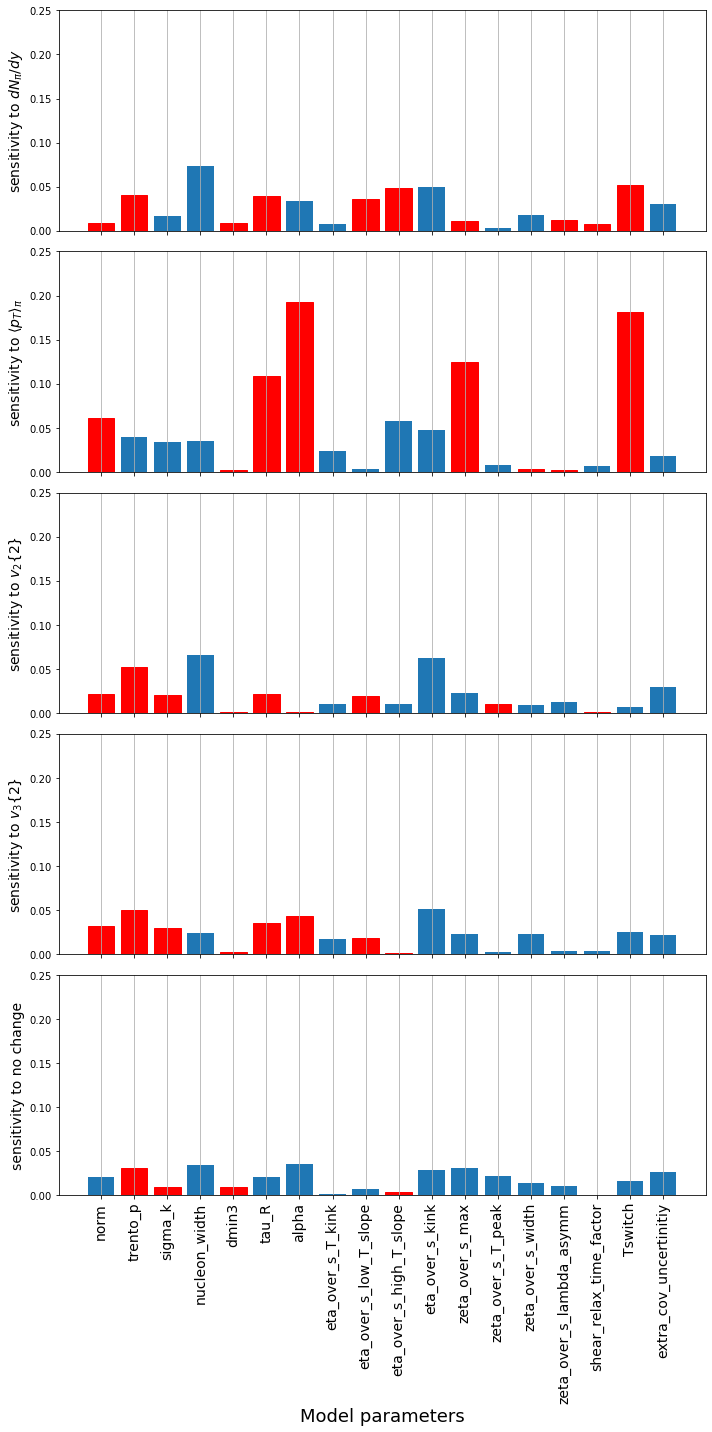

In [13]:
make_all_sensitivity_plot()

In [ ]:
des,des_min,des_max,labl=load_design("Pb-Pb-2760")